In [478]:
import pandas as pd 
import seaborn as sns
import numpy as np

### Acá solo use el steam_games_v1 donde hay algunas modificiaciones pero mas que nada sobre el año 

In [479]:

df_steam = pd.read_csv("../data/csv/steam_games_v1.csv")

In [480]:
df = df_steam.copy()

In [481]:
df["año_v"].isnull().sum()

350

In [482]:
df.loc[df["año_v"] == "nan", "año_v" ] = np.nan

## Convertimos nuestra columna genero a categoría

In [483]:
df["genres"] = df["genres"].astype("category")

In [484]:
## Esta funcion me ayuda a separar los generos que estan en lista y ponerlos por ,

def unir_generos(lista):
    lista = eval(lista)  # Convertir la cadena en una lista
    return ', '.join(lista)

## Generamos los dummies para poder separar los diferentes generos , ¿por qué hacemos esto? Para poder decir si existe o no la ausencia de un genero u otro

In [485]:
df["genres"] = df["genres"].apply(unir_generos) # Acá aplico la función que cree

In [486]:
genres_dummies =  df["genres"].str.get_dummies(sep=", ") # Separo los generos en dummies para poder leerlos correctamente

In [487]:
df = pd.concat([df, genres_dummies], axis=1) ## Los concateno a mi df

## Hacemos lo mismo con las especifiaciones 

In [488]:
df["specs"] = df["specs"].astype("category") ## Acá cambio el tipo de dato para category en las especificaciones

In [489]:
df["specs"] = df["specs"].apply(unir_generos)

In [490]:
specs_dummies = df["specs"].str.get_dummies(sep=", " )
df = pd.concat([df, specs_dummies], axis=1)


In [491]:
df.drop(columns=["specs", "genres", "nan"], inplace=True) ## Dropeo las columnas que ya no necesito por transformarlas en dummies

In [492]:
df["early_access"].replace({False: 0, True:1}, inplace=True) ## Acá reemplazo los true y false por 1 y 0

### Reemplazamos todos los valores que sean free to play o etc por su respectivo 0 ya que el precio es 0 por ser gratis, y además también arreglamos algunos precios que se han subido mal 

In [493]:
df["price"].unique()


remplace = {
     'Free To Play' : 0,
     'Free to Play' : 0,
     'Free' : 0,
     "Free Demo" : 0,
     "Install Now" : 0,
     "Free Mod" : 0,
     "Play Now" : 0,
     "Free HITMAN™ Holiday Pack" : 0,
     "Starting at $499.00" : 499.00,
     "Starting at $449.00" : 449.00,
     "Free to Try" : 0,
     "Free Movie" : 0,
     "Free to Use": 0,
     "Play for Free!" : 0,
     'Install Theme' : 0,
     "Play the Demo" : 0,
     "Play WARMACHINE: Tactics Demo" : 0,
     "Third-party" : 0
}

In [494]:
df["price"].replace(remplace, inplace=True)
df["price"].unique() 

array(['4.99', 0, '0.99', '2.99', '3.99', '9.99', '18.99', '29.99', nan,
       '10.99', '1.59', '14.99', '1.99', '59.99', '8.99', '6.99', '7.99',
       '39.99', '19.99', '7.49', '12.99', '5.99', '2.49', '15.99', '1.25',
       '24.99', '17.99', '61.99', '3.49', '11.99', '13.99', '34.99',
       '74.76', '1.49', '32.99', '99.99', '14.95', '69.99', '16.99',
       '79.99', '49.99', '5.0', '44.99', '13.98', '29.96', '119.99',
       '109.99', '149.99', '771.71', '21.99', '89.99', '0.98', '139.92',
       '4.29', '64.99', '54.99', '74.99', '0.89', '0.5', '299.99', '1.29',
       '3.0', '15.0', '5.49', '23.99', '49.0', '20.99', '10.93', '1.39',
       '36.99', '4.49', '2.0', '4.0', '9.0', '234.99', '1.95', '1.5',
       '199.0', '189.0', '6.66', '27.99', '10.49', '129.99', '179.0',
       '26.99', '399.99', '31.99', '399.0', '20.0', '40.0', '3.33',
       '199.99', '22.99', '320.0', '38.85', '71.7', '59.95', '995.0',
       '27.49', '3.39', '6.0', '19.95', '499.99', '16.06', '4.68',
     

In [495]:
df["price"] = df["price"].astype("float64")

In [496]:
## Volvemos a limpiar el año porque me quedo como si fuera un numero flotante, ya que tuve que pasarlo a flotante porque no me dejaba cambiar de object a int64
df['año_v'] = df["año_v"].astype("string").str.split('.').str[0].astype("string")

In [497]:
## Guardamos esta parte usada para la api 

In [498]:
df_api = df.copy()
df_api["año_v"] = df_api["año_v"].astype("string")
df_api["año_v"] = df_api["año_v"].str.strip()

In [499]:
s = df_api.to_parquet("../data/parquet/steam_model_api_parquet.parquet", engine="pyarrow")

In [500]:
rows_with_nulls = df[df['price'].isnull() & df['metascore'].isnull() & df['año_v'].isnull()]
rows_with_nulls.shape[0]
df.drop(index=rows_with_nulls.index, inplace=True)

In [501]:
df["sentiment"].isnull().sum()

4176

In [502]:
df.dropna(subset=["app_name"], inplace=True)

In [503]:
df.duplicated().sum()

0

In [504]:
df["id"].isnull().sum() ## vemos los id que son nulos para poder eliminarlos

1

In [505]:
df[df["id"].isnull()] ## acá vemos que filas tienen los nulos

,publisher,app_name,title,url,tags,discount_price,reviews_url,price,early_access,id,...,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Tracked Motion Controllers,Valve Anti-Cheat enabled,Windows Mixed Reality
30961,"Warner Bros. Interactive Entertainment, Feral ...",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,"['Action', 'Open World', 'Batman', 'Adventure'...",0.0,NaN,19.99,0,NaN,...,1,1,0,1,0,0,0,0,0,0


In [506]:
df[df["app_name"] == "Batman: Arkham City - Game of the Year Edition"] ## esto lo hice para ver cual era y me parecio una sorpresa que haya dos, entonces elimine uno

,publisher,app_name,title,url,tags,discount_price,reviews_url,price,early_access,id,...,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Tracked Motion Controllers,Valve Anti-Cheat enabled,Windows Mixed Reality
1068,"Warner Bros. Interactive Entertainment, Feral ...",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260/Batma...,"['Action', 'Open World', 'Batman', 'Adventure'...",0.0,http://steamcommunity.com/app/200260/reviews/?...,19.99,0,200260.0,...,1,1,0,1,0,0,0,0,0,0
30961,"Warner Bros. Interactive Entertainment, Feral ...",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,"['Action', 'Open World', 'Batman', 'Adventure'...",0.0,NaN,19.99,0,NaN,...,1,1,0,1,0,0,0,0,0,0


In [507]:
df.drop(index=df[df["id"].isnull()].index, inplace=True)

<AxesSubplot:xlabel='metascore', ylabel='price'>

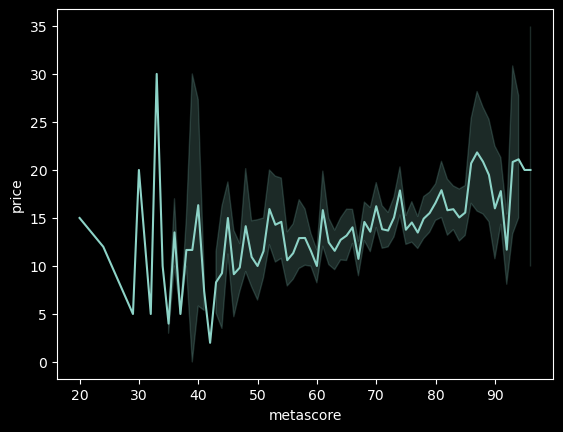

In [508]:
sns.lineplot(data=df, x="metascore", y="price")

### Hacemos una copia para hacer unos cambios en el dataframes donde vamos a eliminar ciertas columnas y filas que segun nuestro criterio son irrelevantes ya que contienen datos nulos o datos que no son los que necesito

In [509]:
df2 = df.copy()

In [510]:
rows_with_price = df2[df2["price"] == 0 & df2["metascore"].isnull()]
df2.drop(index=rows_with_price.index, inplace=True)

In [511]:
filter_price = df2["price"].isnull() & df2["metascore"].isnull()
eliminar_filas =  df2.loc[filter_price, "price"]
df2.drop(index=eliminar_filas.index, inplace=True)

In [512]:
df2["price"].describe()

count    28848.000000
mean         9.485397
std         16.706657
min          0.490000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='metascore'>

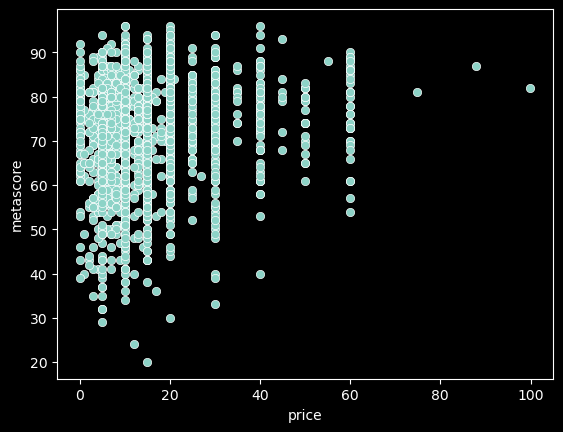

In [513]:
sns.scatterplot(data=df, x="price", y="metascore")

<p>Acá lo que hice fue poner el precio  que sea mayor a 0 ya que los que yo considero que son 0 son free to play, y menos a 90, ya que para arriba de este monto los considero outliers para mi modelo</p>

In [515]:
row_price = df2[(df2["price"] == 0) | (df2["price"] >= 90)]

In [516]:
df2.drop(index=row_price.index, inplace=True)

## Dropeamos columnas que sentimos que son irrelevantes para nuestro modelo

In [517]:
df2.drop(columns=["publisher", "title", "reviews_url", "discount_price", "reviews_url", "developer", "tags", "id", "sentiment"], inplace=True)


In [518]:
df2.head(5)

,url,price,early_access,metascore,año_v,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,...,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Tracked Motion Controllers,Valve Anti-Cheat enabled,Windows Mixed Reality
0,http://store.steampowered.com/app/761140/Lost_...,4.99,0,NaN,2018,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,http://store.steampowered.com/app/767400/2222/,0.99,0,NaN,2017,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,http://store.steampowered.com/app/773570/Log_C...,2.99,0,NaN,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,http://store.steampowered.com/app/772540/Battl...,3.99,0,NaN,2018,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,http://store.steampowered.com/app/774276/SNOW_...,9.99,0,NaN,2018,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0


In [519]:
df2["año_v"].isnull().sum()

67

In [520]:
## Eliminamos las que son nulas tanto para año como metascore ya que no nos va a servir
filas_a_eliminar = df2[df2["año_v"].isnull() & df2["metascore"].isnull() ]

df2 = df2.drop(filas_a_eliminar.index, axis=0)

In [521]:
mask = df2["app_name"].str.contains("Transcripted") & df2["año_v"].isnull()

KeyError: 'app_name'

In [ ]:
mask = df2["app_name"].str.contains("Sleeping Dogs") & df2["año_v"].isnull()
df2.loc[mask, "año_v"] = df2.loc[mask, "año_v"].replace({np.nan: "2012"}, inplace=True)
mask = df2["app_name"].str.contains("Transcripted") & df2["año_v"].isnull()
df2.loc[mask, "año_v"] = df2.loc[mask, "año_v"].replace({"<NA>": "2017"}, inplace=True)

In [ ]:
mask = df2["app_name"].str.contains("Transcripted") & df2["año_v"].isnull()
df2.loc[mask, "año_v"] = df2.loc[mask, "año_v"].replace({np.nan: "2017"}, inplace=True)

In [522]:
df2.dropna(subset=["año_v"], inplace=True)

In [523]:
max_year = df2["año_v"].max()
rows_year = df2[df["año_v"] == max_year]

C:\Users\Agus_\AppData\Local\Temp\ipykernel_17952\2079068280.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rows_year = df2[df["año_v"] == max_year]


In [524]:
df2.drop(index=rows_year.index, inplace=True)

In [525]:
df2.dropna(subset="price", inplace=True)

## Hasta acá es donde vamos a usar nuestro modelo

In [ ]:
s = df2.to_csv("../data/csv/steam_games_modelo.csv",index=False)

## Lo guardo en diferentes lados para poder usarlos tanto como parquet, como csv

In [ ]:
s = df2.to_parquet("../data/parquet/steam_games_modelo.parquet",index=False, engine="pyarrow")